In [1]:
options(warn=-1)

In [2]:
library("titanic")

### About dataset

In [3]:
# read titanic_train
data(titanic_train)

In [4]:
head(titanic_train)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


In [5]:
tail(titanic_train)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
886,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39,0,5,382652,29.125,,Q
887,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.000,,S
888,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.000,B42,S
889,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NA,1,2,W./C. 6607,23.450,,S
890,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.000,C148,C
891,891,0,3,"Dooley, Mr. Patrick",male,32,0,0,370376,7.750,,Q


In [6]:
str(titanic_train)

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : chr  "Braund, Mr. Owen Harris" "Cumings, Mrs. John Bradley (Florence Briggs Thayer)" "Heikkinen, Miss. Laina" "Futrelle, Mrs. Jacques Heath (Lily May Peel)" ...
 $ Sex        : chr  "male" "female" "female" "female" ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : chr  "A/5 21171" "PC 17599" "STON/O2. 3101282" "113803" ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : chr  "" "C85" "" "C123" ...
 $ Embarked   : chr  "S" "C" "S" "S" ...


In [7]:
summary(titanic_train)

  PassengerId       Survived          Pclass          Name          
 Min.   :  1.0   Min.   :0.0000   Min.   :1.000   Length:891        
 1st Qu.:223.5   1st Qu.:0.0000   1st Qu.:2.000   Class :character  
 Median :446.0   Median :0.0000   Median :3.000   Mode  :character  
 Mean   :446.0   Mean   :0.3838   Mean   :2.309                     
 3rd Qu.:668.5   3rd Qu.:1.0000   3rd Qu.:3.000                     
 Max.   :891.0   Max.   :1.0000   Max.   :3.000                     
                                                                    
     Sex                 Age            SibSp           Parch       
 Length:891         Min.   : 0.42   Min.   :0.000   Min.   :0.0000  
 Class :character   1st Qu.:20.12   1st Qu.:0.000   1st Qu.:0.0000  
 Mode  :character   Median :28.00   Median :0.000   Median :0.0000  
                    Mean   :29.70   Mean   :0.523   Mean   :0.3816  
                    3rd Qu.:38.00   3rd Qu.:1.000   3rd Qu.:0.0000  
                    Max.   :80.00 

In [8]:
titanic_sub <- subset(titanic_train, select=c('Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'))
head(titanic_sub)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
,<int>,<int>,<chr>,<dbl>,<int>,<int>,<dbl>,<chr>
1,0,3,male,22,1,0,7.2500,S
2,1,1,female,38,1,0,71.2833,C
3,1,3,female,26,0,0,7.9250,S
4,1,1,female,35,1,0,53.1000,S
5,0,3,male,35,0,0,8.0500,S
6,0,3,male,NA,0,0,8.4583,Q


In [9]:
print(paste('Number of rows in dataframe:', nrow(titanic_sub)))
print(paste('Number of columns in dataframe:', ncol(titanic_sub)))

[1] "Number of rows in dataframe: 891"
[1] "Number of columns in dataframe: 8"


In [10]:
# Kiểm tra null
titanic_sub <- titanic_sub[colSums(!is.na(titanic_sub)) > 0]
titanic_sub <- na.omit(titanic_sub)
head(titanic_sub)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
,<int>,<int>,<chr>,<dbl>,<int>,<int>,<dbl>,<chr>
1,0,3,male,22,1,0,7.2500,S
2,1,1,female,38,1,0,71.2833,C
3,1,3,female,26,0,0,7.9250,S
4,1,1,female,35,1,0,53.1000,S
5,0,3,male,35,0,0,8.0500,S
7,0,1,male,54,0,0,51.8625,S


In [11]:
print(paste('Number of rows after removing null in dataframe:', nrow(titanic_sub)))

[1] "Number of rows after removing null in dataframe: 714"


In [12]:
str(titanic_sub)

'data.frame':	714 obs. of  8 variables:
 $ Survived: int  0 1 1 1 0 0 0 1 1 1 ...
 $ Pclass  : int  3 1 3 1 3 1 3 3 2 3 ...
 $ Sex     : chr  "male" "female" "female" "female" ...
 $ Age     : num  22 38 26 35 35 54 2 27 14 4 ...
 $ SibSp   : int  1 1 0 1 0 0 3 0 1 1 ...
 $ Parch   : int  0 0 0 0 0 0 1 2 0 1 ...
 $ Fare    : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Embarked: chr  "S" "C" "S" "S" ...
 - attr(*, "na.action")= 'omit' Named int [1:177] 6 18 20 27 29 30 32 33 37 43 ...
  ..- attr(*, "names")= chr [1:177] "6" "18" "20" "27" ...


In [13]:
summary(titanic_sub)

    Survived          Pclass          Sex                 Age       
 Min.   :0.0000   Min.   :1.000   Length:714         Min.   : 0.42  
 1st Qu.:0.0000   1st Qu.:1.000   Class :character   1st Qu.:20.12  
 Median :0.0000   Median :2.000   Mode  :character   Median :28.00  
 Mean   :0.4062   Mean   :2.237                      Mean   :29.70  
 3rd Qu.:1.0000   3rd Qu.:3.000                      3rd Qu.:38.00  
 Max.   :1.0000   Max.   :3.000                      Max.   :80.00  
     SibSp            Parch             Fare          Embarked        
 Min.   :0.0000   Min.   :0.0000   Min.   :  0.00   Length:714        
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:  8.05   Class :character  
 Median :0.0000   Median :0.0000   Median : 15.74   Mode  :character  
 Mean   :0.5126   Mean   :0.4314   Mean   : 34.69                     
 3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.: 33.38                     
 Max.   :5.0000   Max.   :6.0000   Max.   :512.33                     

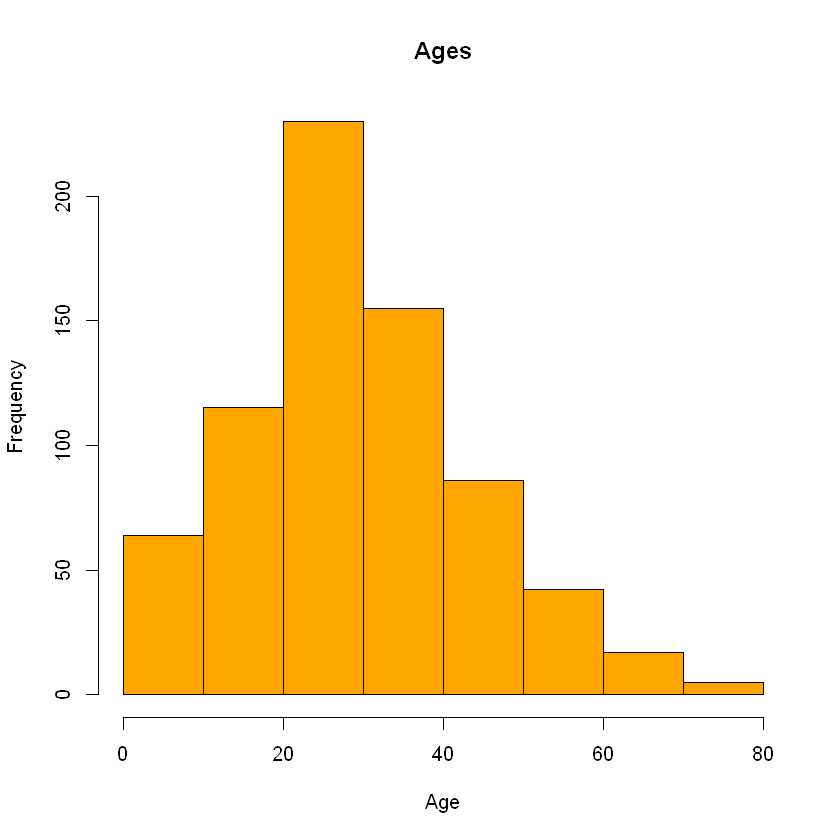

In [14]:
# Vẽ biểu đồ phân phối tần suất của Age. Nhận xét.
hist(titanic_sub$Age, main = 'Ages',
     xlab = 'Age',
     col = 'orange')

- Nhận xét: 

In [15]:
# Thực hiện các thống kê cơ bản cho Age và Fare (mean, median, mode, max, min, range)
print('Thống kê cơ bản cho Age')
summary(titanic_sub$Age)
print('Thống kê cơ bản cho Fare')
summary(titanic_sub$Fare)

[1] "Thống kê cơ bản cho Age"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.42   20.12   28.00   29.70   38.00   80.00 

[1] "Thống kê cơ bản cho Fare"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    8.05   15.74   34.69   33.38  512.33 

In [16]:
titanic_sub_fare <- quantile(titanic_sub$Fare, c(0.05, 0.3, 0.6, 0.95))
titanic_sub_fare

5%       30%       60%       95% 
  7.22500   9.19503  26.00000 120.00000

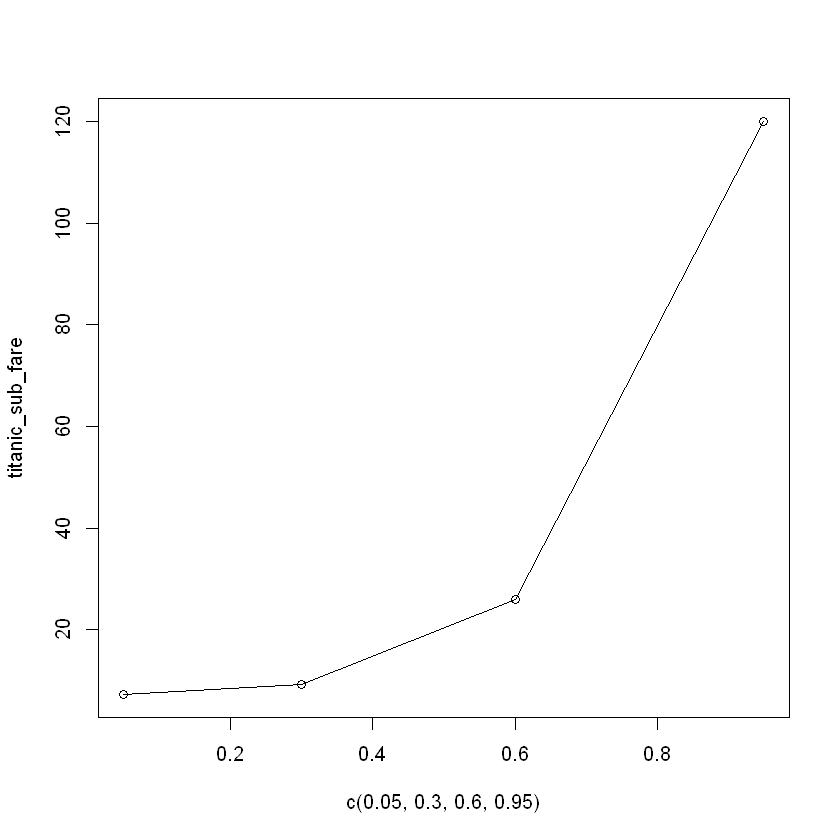

In [17]:
# plot the line
plot(c(0.05, 0.3, 0.6, 0.95), titanic_sub_fare, type = 'o')

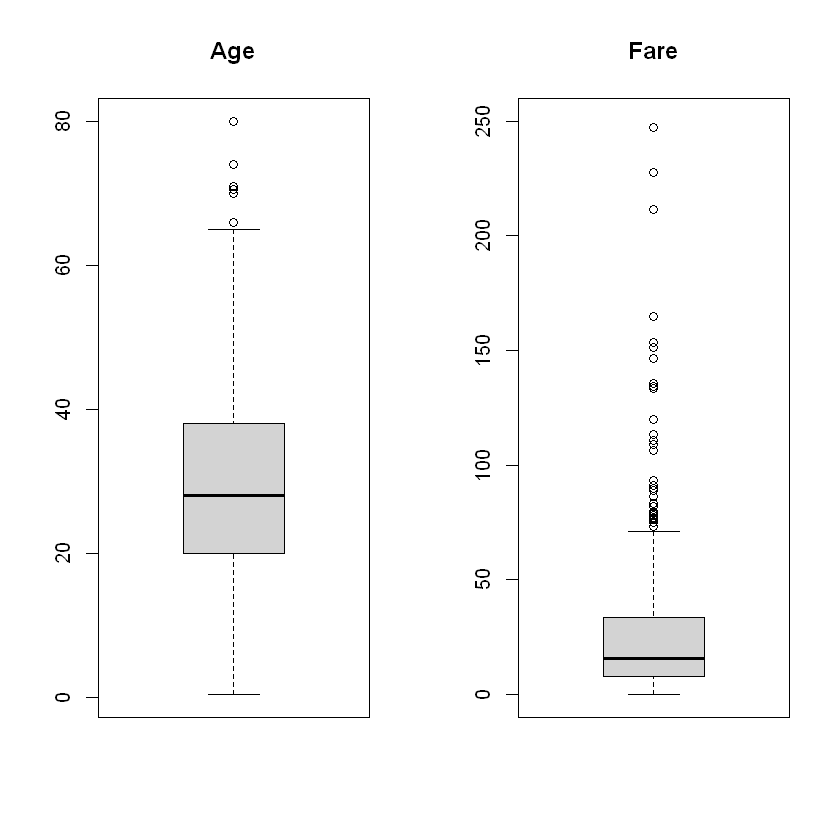

In [18]:
# check for outliers
par(mfrow = c(1,2)) # divide graph area in 2 columns
boxplot(titanic_sub$Age, main = 'Age')
boxplot(titanic_sub$Fare, main = 'Fare', ylim = c(0, 250))

- Nhận xét: Cả Age và Fare đều có outliers

In [19]:
age_outliers <- boxplot.stats(titanic_sub$Age)$out
print('age_outliers:')
print(age_outliers)

fare_outliers <- c(boxplot.stats(titanic_sub$Fare)$out)
print('fare_outliers:')
print(fare_outliers)

[1] "age_outliers:"
[1] 66.0 71.0 70.5 71.0 80.0 70.0 70.0 74.0
[1] "fare_outliers:"
 [1] 263.0000  82.1708  76.7292  80.0000  83.4750  73.5000 263.0000  77.2875
 [9] 247.5208  73.5000  77.2875  79.2000 146.5208 113.2750  76.2917  90.0000
[17]  83.4750  90.0000  86.5000 512.3292  79.6500 153.4625 135.6333  77.9583
[25]  78.8500  91.0792 151.5500 247.5208 151.5500 108.9000  83.1583 262.3750
[33] 164.8667 134.5000 135.6333 153.4625 134.5000 263.0000  75.2500 135.6333
[41] 211.5000 227.5250  73.5000 120.0000 113.2750  90.0000 120.0000 263.0000
[49]  81.8583  89.1042  91.0792  90.0000  78.2667 151.5500  86.5000 108.9000
[57]  93.5000 106.4250 106.4250 110.8833  79.6500 110.8833  79.6500  79.2000
[65]  78.2667 153.4625  77.9583  76.7292  73.5000 113.2750 133.6500  73.5000
[73] 512.3292  76.7292 211.3375 110.8833 227.5250 151.5500 227.5250 211.3375
[81] 512.3292  78.8500 262.3750  86.5000 120.0000  77.9583 211.3375  79.2000
[89] 120.0000  93.5000  80.0000  83.1583 164.8667  83.1583


In [20]:
print('Number of outliers in Age')
outlier_num_age <-
sum(titanic_sub$Age < quantile(titanic_sub$Age, p = 0.25) - 1.5 * IQR(titanic_sub$Age)) +
sum(titanic_sub$Age > quantile(titanic_sub$Age, p = 0.75) + 1.5 * IQR(titanic_sub$Age))
outlier_num_age

[1] "Number of outliers in Age"


[1] 11

In [21]:
print('Number of outliers in Fare')
outlier_num_fare <-
sum(titanic_sub$Fare < quantile(titanic_sub$Fare, p = 0.25) - 1.5 * IQR(titanic_sub$Fare)) +
sum(titanic_sub$Fare > quantile(titanic_sub$Fare, p = 0.75) + 1.5 * IQR(titanic_sub$Fare))
outlier_num_fare

[1] "Number of outliers in Fare"


[1] 94

In [22]:
# drop rows have outliers
print(paste('Before dropping:', nrow(titanic_sub)))
for (record in age_outliers) {
    titanic_sub <- titanic_sub[titanic_sub$Age != record,]
    }
for (record in fare_outliers) {
    titanic_sub <- titanic_sub[titanic_sub$Fare != record,]
    }
print(paste('After dropping:', nrow(titanic_sub)))

[1] "Before dropping: 714"
[1] "After dropping: 612"


In [23]:
# Vẽ pie chart thống kê hành khách theo từng cột Survived, PClass, Sex. Nhận xét.
survived <- table(titanic_sub$Survived)
colors1 <- c('red','yellow')

pclass <- table(titanic_sub$Pclass)
colors2 <- c('blue', 'pink', 'green')

sex <- table(titanic_sub$Sex)
colors3 <- c('violet', 'cyan')

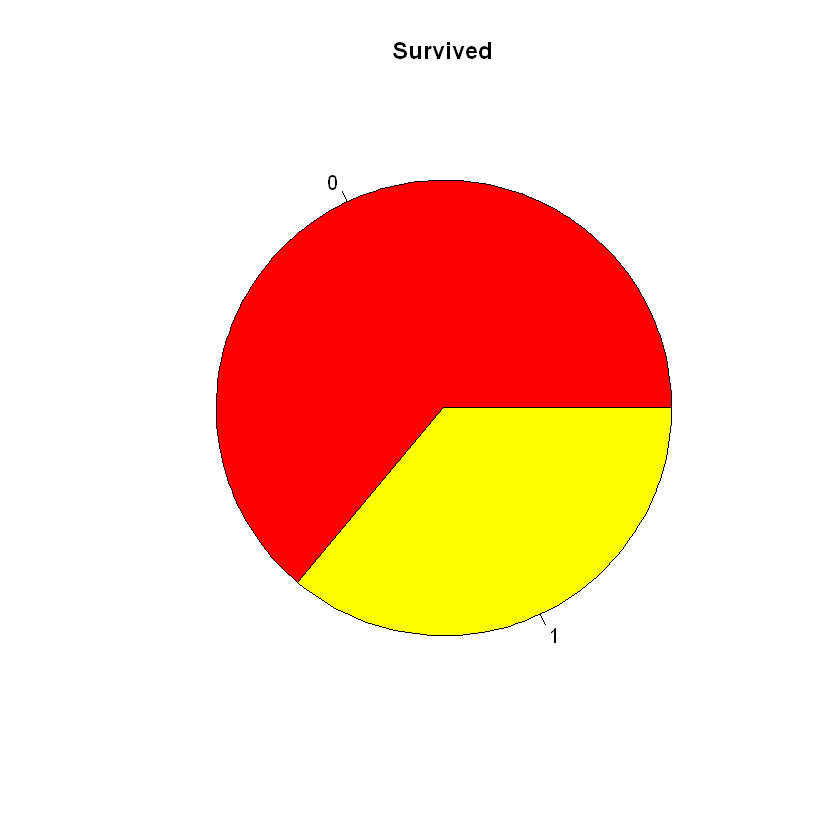

In [24]:
pie(survived, col = colors1, main = 'Survived')

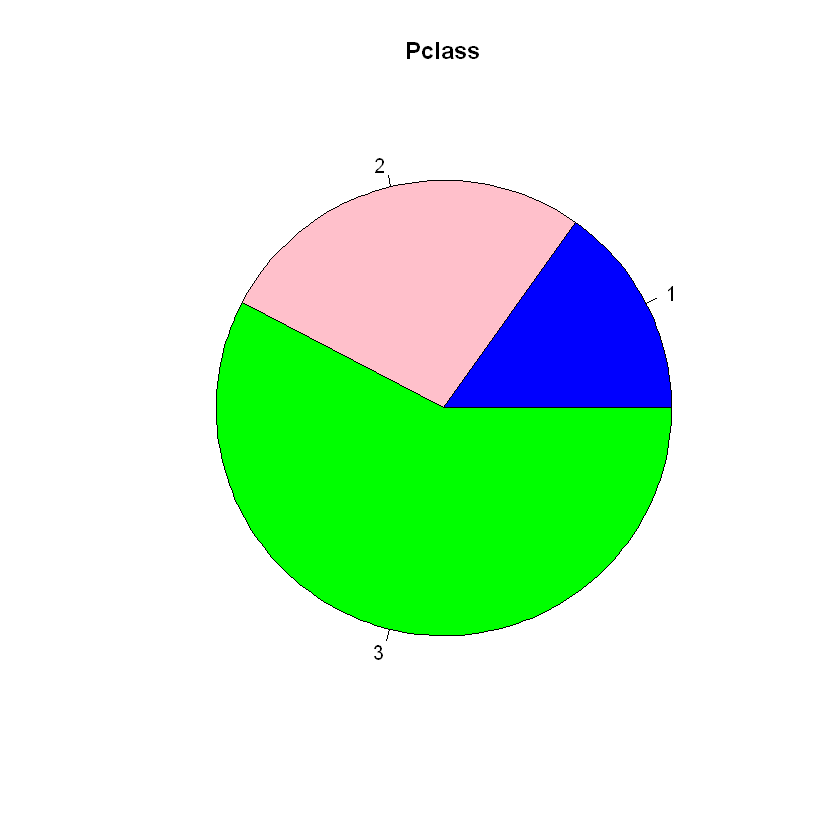

In [25]:
pie(pclass, col = colors2, main = 'Pclass')

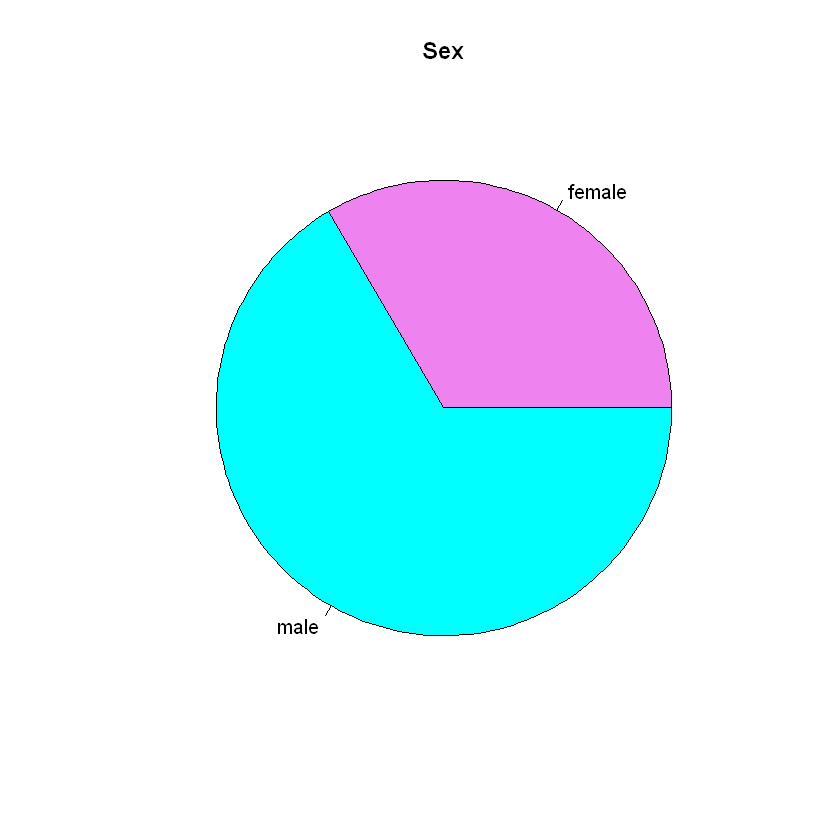

In [26]:
pie(sex, col = colors3, main = 'Sex')

- Nhận xét: Biểu đồ 1 cho thấy số lượng người survived thấp hơn số lượng người không survived được
- Biểu đồ 2 cho thấy Pclass = 3 chiếm số lượng cao nhất
- Biểu đồ 3 cho thấy có male nhiều hơn female

In [27]:
# Tính phương sai của tất cả các thuộc tính số trong titanic_sub.
sapply(subset(titanic_sub, select = -c(Sex, Embarked)), var)

Survived      Pclass         Age       SibSp       Parch        Fare 
  0.2310875   0.5491694 185.7060798   0.9148508   0.7258646 211.7487347

In [28]:
# Tính standard deviation của tất cả các thuộc tính số trong titanic_sub.
sapply(subset(titanic_sub, select = -c(Sex, Embarked)), sd)

Survived     Pclass        Age      SibSp      Parch       Fare 
 0.4807156  0.7410596 13.6274018  0.9564783  0.8519769 14.5515887

In [29]:
library(e1071)

In [30]:
# Tính skewness của tất cả các thuộc tính số trong titanic_sub. Nhận xét cho từng thuộc tính
sapply(subset(titanic_sub, select = -c(Sex, Embarked)), skewness)

Survived     Pclass        Age      SibSp      Parch       Fare 
 0.5768981 -0.8615401  0.2345486  2.6235373  2.8485920  1.4419125

- Nhận xét: Survived, Age, SibSp, Parch và Fare: Phân phối lệch phải. Pclass là phân phối lệch trái 

In [31]:
# Tính kurtosis của tất cả các thuộc tính số trong titanic_sub. Nhận xét cho từng thuộc tính.
sapply(subset(titanic_sub, select = -c(Sex, Embarked)), kurtosis)

Survived      Pclass         Age       SibSp       Parch        Fare 
-1.66990922 -0.68467348 -0.04728006  7.28052935 10.28266393  1.55030993

- Nhận xét: Survived, Age, Pclass và Fare (<3): Phân phối thấp hơn phân phối chuẩn. SibSp và Parch: phân phối cao hơn phân phối chuẩn => distribution has more values in the tails compared to a normal distribution.

In [32]:
# Vẽ biểu đồ thể hiện mối quan hệ giữa Age và Fare theo Sex, có bổ sung thêm histogram phụ trên mỗi cột. Nhận xét biểu đồ.
age_fare_male <- subset(titanic_sub, titanic_sub$Sex == 'male')
age_fare_female <- subset(titanic_sub, titanic_sub$Sex == 'female')

In [33]:
library(ggplot2)
library(ggExtra)

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


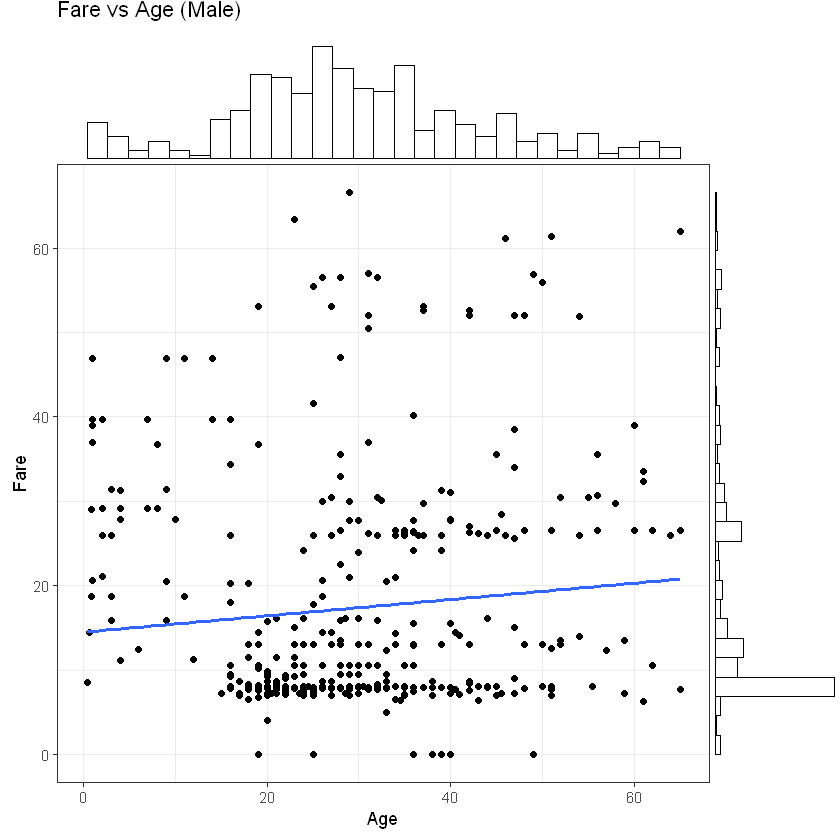

In [34]:
gg <- ggplot(data = age_fare_male, aes(x=Age, y=Fare)) +
geom_point() +
geom_smooth(method = 'lm', se = F) +
labs(y='Fare',
     x ='Age',
     title = 'Fare vs Age (Male)')
theme_set(theme_bw())

ggMarginal(gg, type = 'histogram', fill = 'transparent')

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


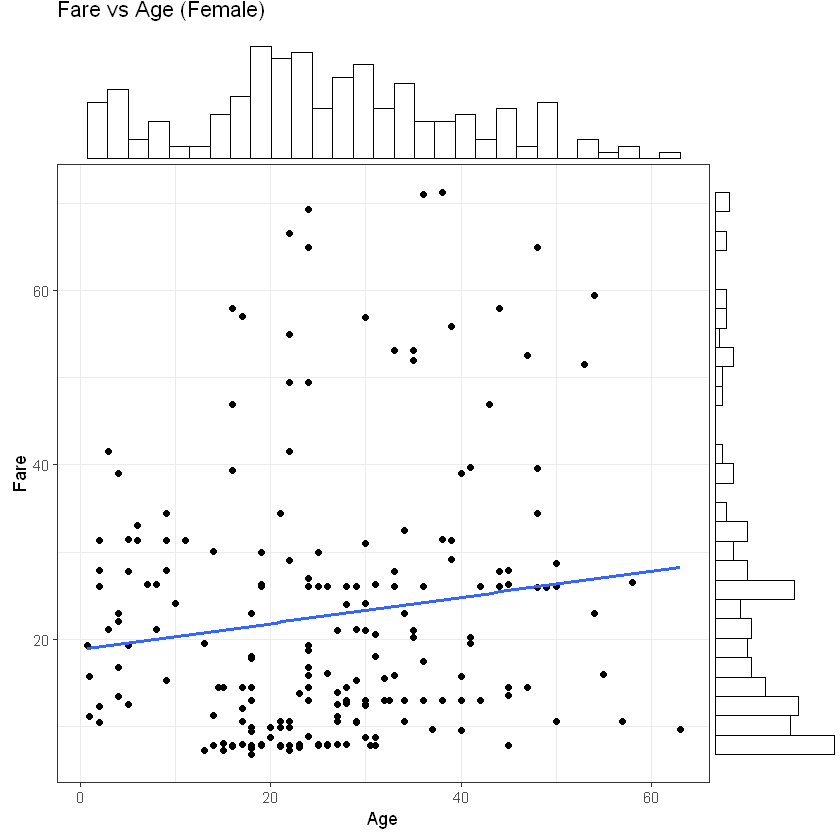

In [35]:
gg1 <- ggplot(data = age_fare_female, aes(x=Age, y=Fare)) +
geom_point() +
geom_smooth(method = 'lm', se = F) +
labs(y='Fare',
     x ='Age',
     title = 'Fare vs Age (Female)')
theme_set(theme_bw())

ggMarginal(gg1, type = 'histogram', fill = 'transparent')

- Nhận xét: Fare của Male và Female đều skewed right nhưng fare của Female có variance cao hơn của Male. Age của Male và Female không quá khác nhau

In [36]:
# Tính giá trị covariance, correlation giữa Age và Fare. Nhận xét.
print('Covariance giữa Age và Fare')
print(cov(titanic_sub$Age, titanic_sub$Fare)) 
print('Correlation giữa Age và Fare')
print(cor(titanic_sub$Age, titanic_sub$Fare)) 

[1] "Covariance giữa Age và Fare"
[1] 16.69405
[1] "Correlation giữa Age và Fare"
[1] 0.08418571


- Nhận xét: giữa Age và Fare không có correlation

In [37]:
# Cho biết số lượng mẫu có giá trị Fare >= 50, xác suất mẫu có Fare>=50 là bao nhiêu? Nhận xét.
fare_above_50 <- subset(titanic_sub, titanic_sub$Fare >= 50, select = c(Fare))

In [38]:
# số lượng mẫu có giá trị Fare >= 50
nrow(fare_above_50)

[1] 43

In [39]:
mean(titanic_sub$Fare)

[1] 19.16852

In [40]:
sd(titanic_sub$Fare)

[1] 14.55159

In [41]:
# xác suất mẫu có Fare>=50 là bao nhiêu?
1-pnorm(50, mean = mean(titanic_sub$Fare), sd = sd(titanic_sub$Fare))

[1] 0.01705494

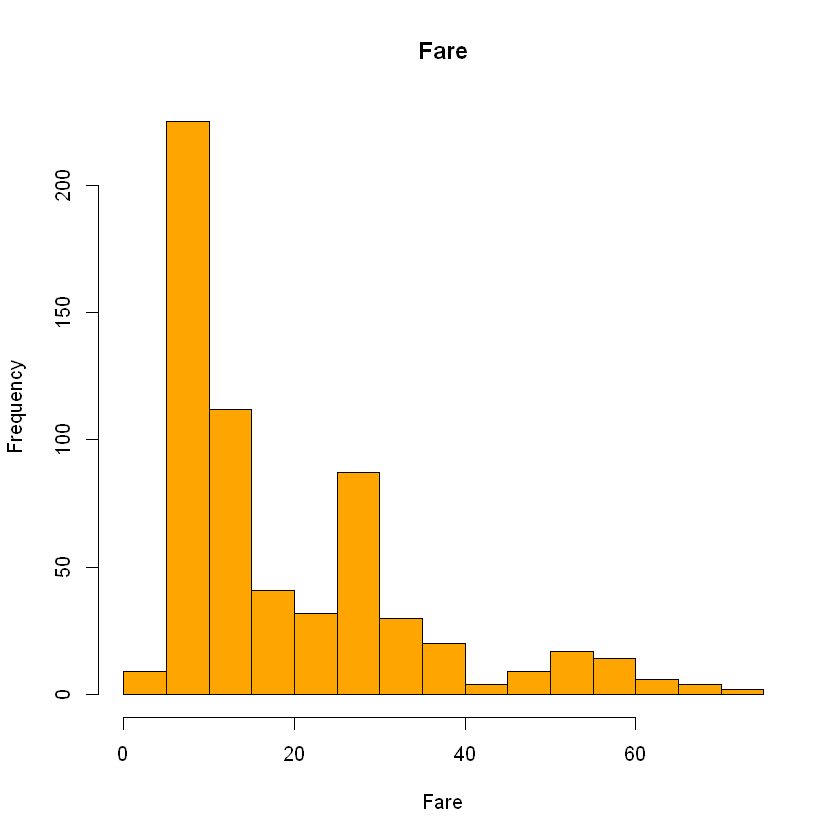

In [42]:
hist(titanic_sub$Fare, main = 'Fare',
     xlab = 'Fare',
     col = 'orange')

- Nhận xét: xác suất fare >= 50 là ~1.7%. 